<a href="https://colab.research.google.com/github/geethaammu/Programming/blob/main/EDA_Email_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')



Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mailbox
import csv

In [ ]:
mboxfile = "/content/drive/MyDrive/MyEmailbox2.mbox"
mbox = mailbox.mbox(mboxfile)
mbox


In [ ]:
for key in mbox[0].keys():
  print(key)

X-GM-THRID
X-Gmail-Labels
Delivered-To
Received
X-Received
ARC-Seal
ARC-Message-Signature
ARC-Authentication-Results
Return-Path
Received
Received-SPF
Authentication-Results
DKIM-Signature
X-Google-DKIM-Signature
X-Gm-Message-State
X-Google-Smtp-Source
X-Received
MIME-Version
From
Date
Message-ID
Subject
To
Cc
Content-Type


In [ ]:
with open('mailbox.csv', 'w') as outputfile:
  writer = csv.writer(outputfile)
  writer.writerow(['subject','from','date','to','Cc','received'])
  for message in mbox:
    writer.writerow([
    message['subject'],
    message['from'],
    message['date'],
    message['to'],
    message['Cc'],
    message['received']
  ]
)

In [ ]:
dfs = pd.read_csv('mailbox.csv', names=['subject', 'from', 'date', 'to','Cc', 'received'])

In [ ]:
dfs.head(10)

,subject,from,date,to,Cc,received
0,subject,from,date,to,Cc,received
1,ISO New Form - reg.,rit iso <ritiso@ritrjpm.ac.in>,"Thu, 25 Aug 2022 12:47:41 +0530",faculty@ritrjpm.ac.in,"principal@ritrjpm.ac.in, vp@ritrjpm.ac.in, \r\...",by 2002:a05:7011:287:b0:2ed:b29:cc43 with SMTP...
2,Re: Academic audit report -reg,Gnana Priya G <gnanapriya@ritrjpm.ac.in>,"Tue, 16 Aug 2022 11:08:05 +0530",academiccoordinator rit <academiccoordinator@r...,NaN,by 2002:a05:7011:287:b0:2ed:b29:cc43 with SMTP...
3,Academic audit report -reg,academiccoordinator rit <academiccoordinator@r...,"Tue, 16 Aug 2022 10:42:23 +0530",Gnana Priya <gnanapriya@ritrjpm.ac.in>,NaN,NaN
4,V and VII semester open Elective list with han...,academiccoordinator rit <academiccoordinator@r...,"Mon, 8 Aug 2022 14:58:53 +0530",yogaraja C A <yogaraja@ritrjpm.ac.in>,"Indhumathi M <indhumathi@ritrjpm.ac.in>, \r\n\...",NaN
5,Corrected Academic calender -2022-2023-III sel...,ritacademiccoordinator rit <ritacademiccoordin...,"Thu, 25 Aug 2022 12:01:56 +0530",faculty@ritrjpm.ac.in,"Principal <principal@ritrjpm.ac.in>, vice prin...",NaN
6,Fwd: CIRCULAR-RIT/Academic/2022-2023/Faculty M...,academiccoordinator rit <academiccoordinator@r...,"Wed, 10 Aug 2022 13:00:04 +0530",faculty@ritrjpm.ac.in,"Principal <principal@ritrjpm.ac.in>, vice prin...",NaN
7,CIRCULAR-RIT/Academic/2022-2023/Faculty Meetin...,academiccoordinator rit <academiccoordinator@r...,"Fri, 5 Aug 2022 16:38:25 +0530",faculty@ritrjpm.ac.in,"Principal <principal@ritrjpm.ac.in>, vice prin...",NaN
8,suggested additional hours - III semester cour...,academiccoordinator rit <academiccoordinator@r...,"Mon, 22 Aug 2022 11:21:45 +0530",Vijayalakshmi K <vijayalakshmik@ritrjpm.ac.in>...,NaN,NaN
9,"Share request for ""AD 2022-2026""","""Anbarasan C (via Google Sheets)"" <drive-share...","Wed, 03 Aug 2022 09:36:14 +0000",academiccoordinator@ritrjpm.ac.in,NaN,by 2002:a05:7011:b90:b0:2ec:841e:4bfe with SMT...


In [ ]:
dfs['date'] = dfs['date'].apply(lambda x: pd.to_datetime(x,errors='coerce', utc=True))

In [ ]:
dfs = dfs[dfs['Cc'].notna()]
dfs.to_csv('gmail.csv')

In [ ]:
import re
def extract_email_ID(string):
  email = re.findall(r'<(.+?)>', string)
  if not email:
    email = list(filter(lambda y: '@' in y, string.split()))
  return email[0] if email else np.nan

In [ ]:
dfs['from'] = dfs['from'].apply(lambda x: extract_email_ID(x))
dfs['Cc']=dfs['Cc'].apply(lambda x:extract_email_ID(x))

In [ ]:
myemail = 'kaliappan@rjpm..ac.in'
dfs['label'] = dfs['from'].apply(lambda x: 'sent' if x==myemail else 'inbox')

In [ ]:
dfs.drop(columns='to',inplace=True)



In [ ]:
dfs.head(5)

,subject,from,date,Cc,received,label
0,subject,NaN,NaT,NaN,received,inbox
1,ISO New Form - reg.,ritiso@ritrjpm.ac.in,2022-08-25 07:17:41+00:00,dgmadmin@ritrjpm.ac.in,by 2002:a05:7011:287:b0:2ed:b29:cc43 with SMTP...,inbox
4,V and VII semester open Elective list with han...,academiccoordinator@ritrjpm.ac.in,2022-08-08 09:28:53+00:00,indhumathi@ritrjpm.ac.in,NaN,inbox
5,Corrected Academic calender -2022-2023-III sel...,ritacademiccoordinator@ritrjpm.ac.in,2022-08-25 06:31:56+00:00,principal@ritrjpm.ac.in,NaN,inbox
6,Fwd: CIRCULAR-RIT/Academic/2022-2023/Faculty M...,academiccoordinator@ritrjpm.ac.in,2022-08-10 07:30:04+00:00,principal@ritrjpm.ac.in,NaN,inbox


In [ ]:
dfs['Cc']



0                                NaN
1             dgmadmin@ritrjpm.ac.in
4           indhumathi@ritrjpm.ac.in
5            principal@ritrjpm.ac.in
6            principal@ritrjpm.ac.in
                   ...              
436         kaliappan@ritrjpm.ac.in,
445         basarikodi@ritrjpm.ac.in
447    rajakarunakaran@ritrjpm.ac.in
455          principal@ritrjpm.ac.in
457    rajakarunakaran@ritrjpm.ac.in
Name: Cc, Length: 199, dtype: object

In [ ]:
import pytz
def refactor_timezone(x):
  ind = pytz.timezone('Asia/Kolkata')
  return x.astimezone(ind)



In [ ]:
dfs['date'] = dfs['date'].apply(lambda x: refactor_timezone(x))
dfs['dayofweek'] = dfs['date'].apply(lambda x: x.day_name())
dfs['dayofweek'] = pd.Categorical(dfs['dayofweek'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday'], ordered=True)
dfs['timeofday'] = dfs['date'].apply(lambda x: x.hour + x.minute/60+ x.second/3600)
dfs['hour'] = dfs['date'].apply(lambda x: x.hour)
dfs['year_int'] = dfs['date'].apply(lambda x: x.year)
dfs['year'] = dfs['date'].apply(lambda x: x.year +x.dayofyear/365.25)
dfs.index = dfs['date']
del dfs['date']



ValueError: ignored

In [ ]:
print(dfs.index.min().strftime('%a, %d %b %Y %I:%M %p'))
print(dfs.index.max().strftime('%a, %d %b %Y %I:%M %p'))
print(dfs['label'].value_counts())




AttributeError: ignored

In [ ]:
dfs.Cc.unique

<bound method Series.unique of 0                                NaN
1             dgmadmin@ritrjpm.ac.in
4           indhumathi@ritrjpm.ac.in
5            principal@ritrjpm.ac.in
6            principal@ritrjpm.ac.in
                   ...              
436         kaliappan@ritrjpm.ac.in,
445         basarikodi@ritrjpm.ac.in
447    rajakarunakaran@ritrjpm.ac.in
455          principal@ritrjpm.ac.in
457    rajakarunakaran@ritrjpm.ac.in
Name: Cc, Length: 199, dtype: object>

ValueError: ignored

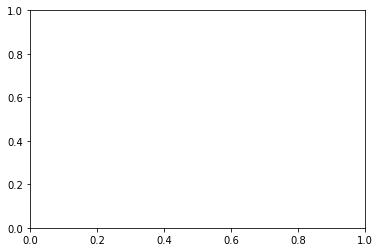

In [ ]:
plt.plot(dfs["Cc"])

